In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Plotting Uniform Distribution

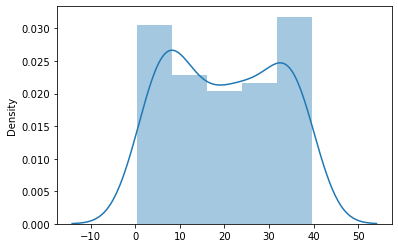

In [5]:
uniform_100 = np.random.uniform(low=0, high = 40 ,size=100)
sns.distplot(uniform_100)
plt.show()

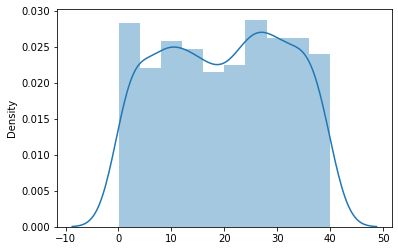

In [6]:
uniform_1000 = np.random.uniform(low=0, high = 40 ,size=1000)
sns.distplot(uniform_1000)
plt.show()

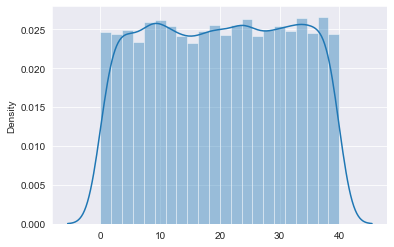

In [44]:
uniform_10000 = np.random.uniform(low=0, high = 40 ,size=10000)
sns.distplot(uniform_10000)
plt.show()

## Plotting Normal Distribution

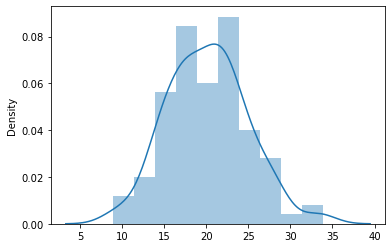

In [11]:
normal_100 = np.random.normal(loc = 20, scale = 5, size=100)
sns.distplot(normal_100)
plt.show()

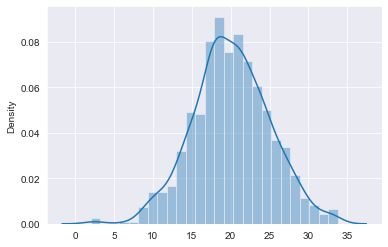

In [36]:
random.seed(0)
normal_1000 = np.random.normal(loc = 20, scale = 5, size=1000)
sns.distplot(normal_1000)
plt.show()

In [16]:
mean_normal_1000 = normal_1000.mean()
std_normal_1000 = normal_1000.std()
print(mean_normal_1000,std_normal_1000)

20.128062544094643 4.9161598495035435


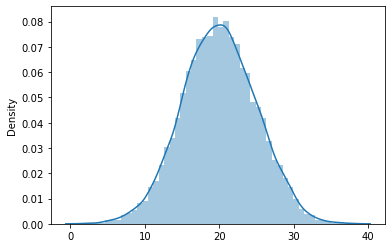

In [18]:
random.seed(0)
normal_10000 = np.random.normal(loc = 20, scale = 5, size=10000)
sns.distplot(normal_10000)
plt.show()

In [19]:
mean_normal_10000 = normal_10000.mean()
std_normal_10000 = normal_10000.std()
print(mean_normal_10000,std_normal_10000)

20.00170284388858 4.978740731804372


In [20]:
one_std_right = mean_normal_10000 + 1 * std_normal_10000

one_std_left = mean_normal_10000 - 1 * std_normal_10000

two_std_right = mean_normal_10000 + 2 * std_normal_10000

two_std_left = mean_normal_10000 - 2 * std_normal_10000

three_std_right = mean_normal_10000 + 3 * std_normal_10000

three_std_left = mean_normal_10000 - 3 * std_normal_10000

### 68.2, 95.4, 99.7 empirical rule

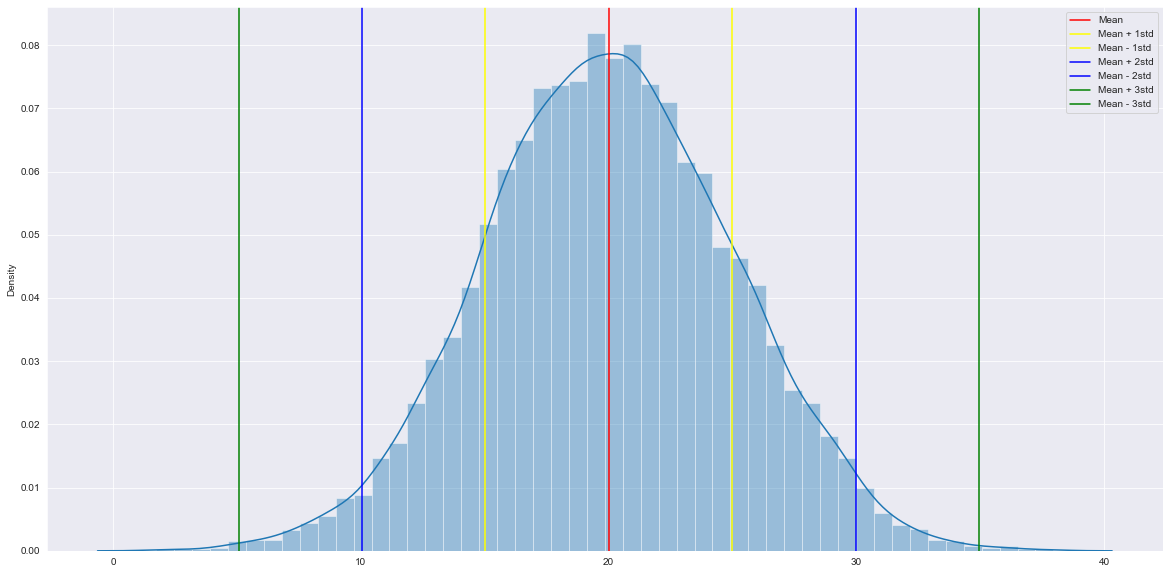

In [24]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.distplot(normal_10000)
plt.axvline(mean_normal_10000, color='red',label = 'Mean')
plt.axvline(one_std_right, color='yellow',label = 'Mean + 1std')
plt.axvline(one_std_left, color='yellow',label = 'Mean - 1std')
plt.axvline(two_std_right, color='blue',label = 'Mean + 2std')
plt.axvline(two_std_left, color='blue',label = 'Mean - 2std')
plt.axvline(three_std_right, color='green',label = 'Mean + 3std')
plt.axvline(three_std_left, color='green',label = 'Mean - 3std')
plt.legend()
plt.show()

In [26]:
((one_std_left < normal_10000) & (normal_10000 < one_std_right)).sum()

6817

In [27]:
6817/10000

0.6817

In [28]:
((two_std_left < normal_10000) & (normal_10000 < two_std_right)).sum()/10000

0.9568

In [29]:
((three_std_left < normal_10000) & (normal_10000 < three_std_right)).sum()/10000

0.9974

### Checking Skewness and Kurtosis values

In [32]:
df_100 = pd.DataFrame({'uniform':uniform_100,'normal':normal_100})

In [33]:
df_100['uniform'].skew()

0.03572964418272458

In [34]:
df_100['normal'].skew()

0.26012068480203376

In [37]:
df_1000 = pd.DataFrame({'uniform':uniform_1000,'normal':normal_1000})

In [38]:
df_1000['uniform'].skew()

-0.039698116321606886

In [39]:
df_1000['normal'].skew()

-0.012677691414530146

In [40]:
df_100['uniform'].kurt()

-1.377891716741694

In [42]:
df_100['normal'].kurt()

0.17861299271204967

In [43]:
df_1000['normal'].kurt()

0.20579273974142476

In [45]:
df_10000 = pd.DataFrame({'uniform':uniform_10000,'normal':normal_10000})

In [46]:
df_10000['normal'].kurt()

-0.032683984178873526

### Checking Normality with QQ Plot

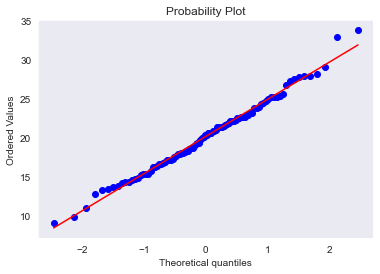

In [54]:
from scipy import stats
stats.probplot(df_100['normal'],dist='norm',plot=plt)
plt.grid()

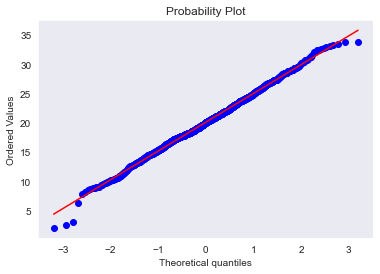

In [55]:
stats.probplot(df_1000['normal'],dist='norm',plot=plt)
plt.grid()

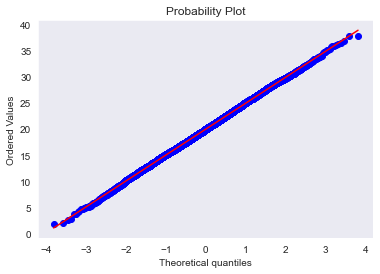

In [56]:
stats.probplot(df_10000['normal'],dist='norm',plot=plt)
plt.grid()

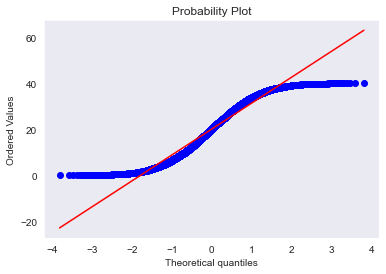

In [57]:
stats.probplot(df_10000['uniform'],dist='norm',plot=plt)
plt.grid()

### Box Cox Transformation

<AxesSubplot:ylabel='Density'>

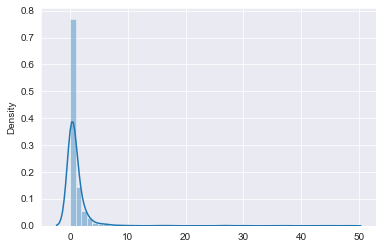

In [58]:
paret = np.random.pareto(a = 2, size = 1000)
sns.distplot(paret)

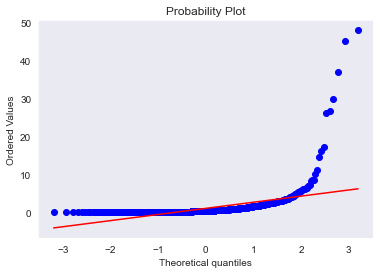

In [60]:
# Normality test
stats.probplot(paret,dist="norm",plot=plt)
plt.grid()

In [62]:
# Apply transformation
paret_tran = stats.boxcox(paret)

In [71]:
paret_tran[1]

0.07268255647428551

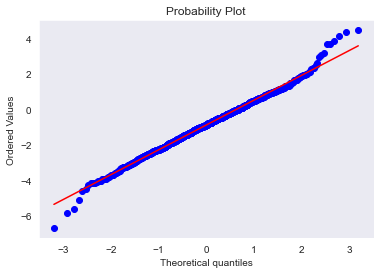

In [70]:
stats.probplot(paret_tran[0], dist='norm',plot=plt)
plt.grid()